In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.express as px
import seaborn as sns

In [2]:
import matplotlib
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

C:\Users\kavit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\kavit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
import datetime as dt
from datetime import datetime

In [4]:
df = pd.read_csv(r"E:\Machine Learning Project\archive (1)\AirPassengers.csv")

In [5]:
df.head(13)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [6]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [7]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [8]:
df_copy = df.copy()

In [9]:
df_copy['Date'] = pd.to_datetime(df_copy.Month)

In [10]:
df_copy.head()

,Month,#Passengers,Date
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [11]:
df_copy.dtypes

Month                  object
#Passengers             int64
Date           datetime64[ns]
dtype: object

<AxesSubplot:xlabel='Date'>

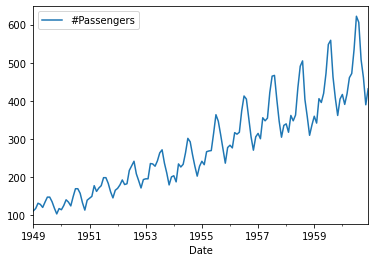

In [12]:
df_copy.plot(x = 'Date', y = '#Passengers')

In [13]:

df_copy['year'] = pd.DatetimeIndex(df_copy['Date']).year
df_copy['month'] = pd.DatetimeIndex(df_copy['Date']).month

In [14]:
df_copy['month'].value_counts()

1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
Name: month, dtype: int64

In [15]:
df_copy['year'].max()

1960

In [16]:
df_copy.drop(columns = ['year', 'month'], inplace = True)

In [17]:
df_copy.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

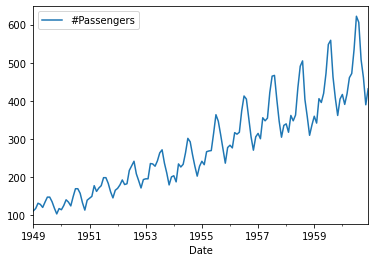

In [18]:
df_copy.plot()

In [19]:

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [20]:
df_copy.drop(columns = ['Month'], inplace = True)

In [21]:
df_copy.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

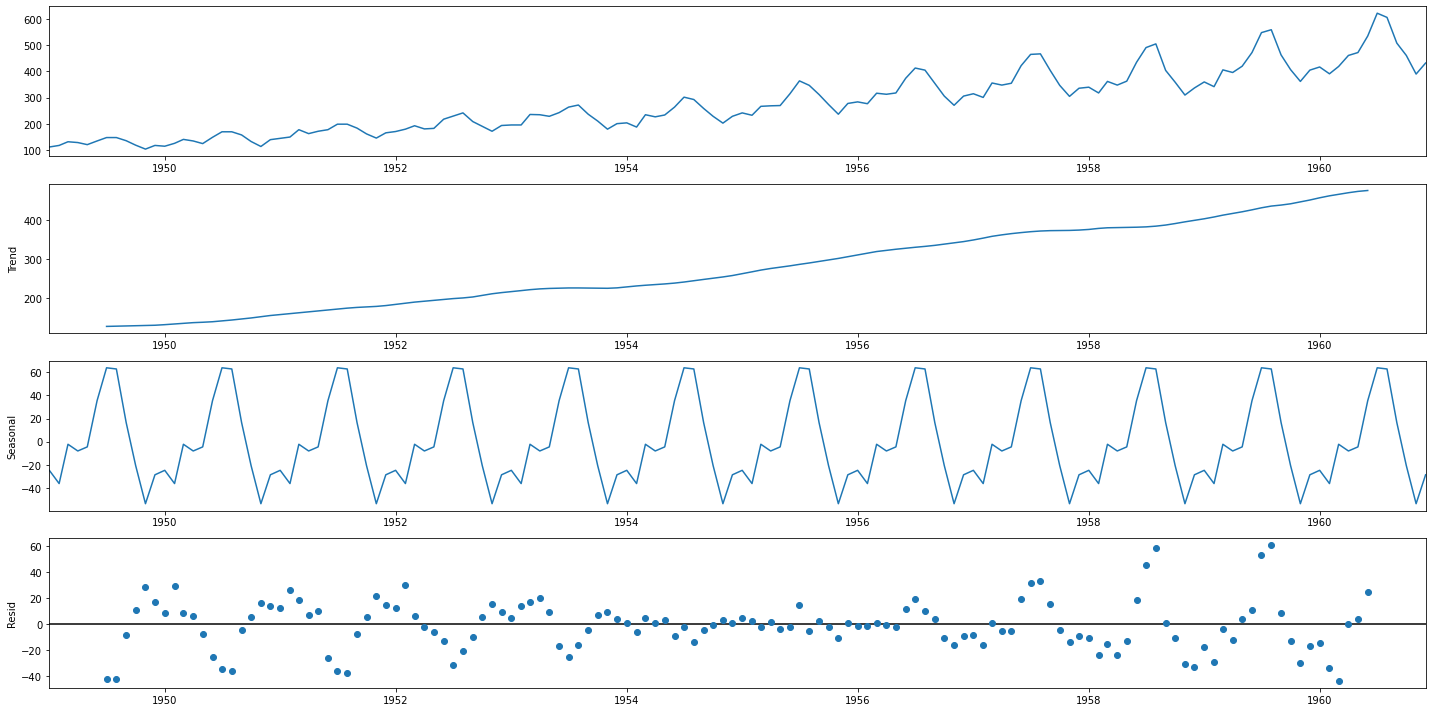

In [23]:
result_add = seasonal_decompose(df_copy, model='additive')
result_add.plot()
plt.show()

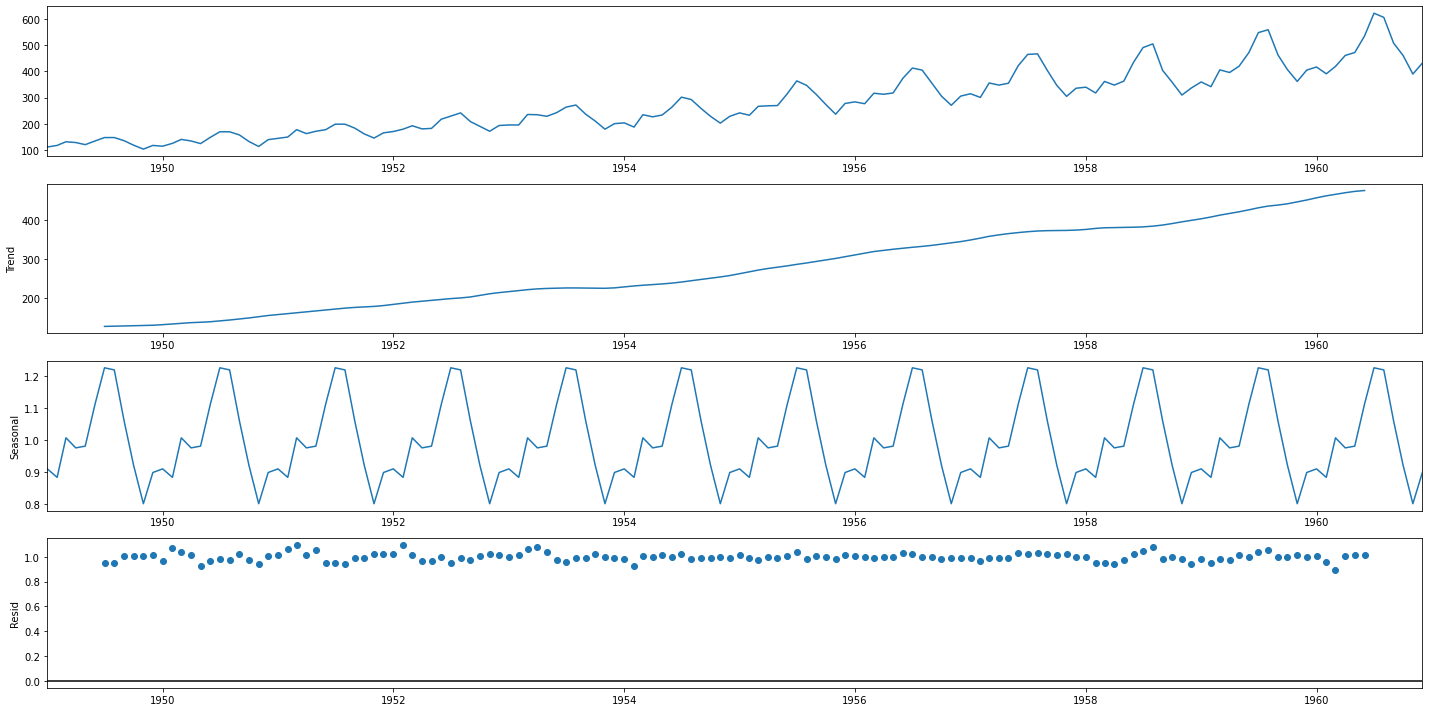

In [24]:
result_mul = seasonal_decompose(df_copy, model='multiplicative')
result_mul.plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_copy)

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

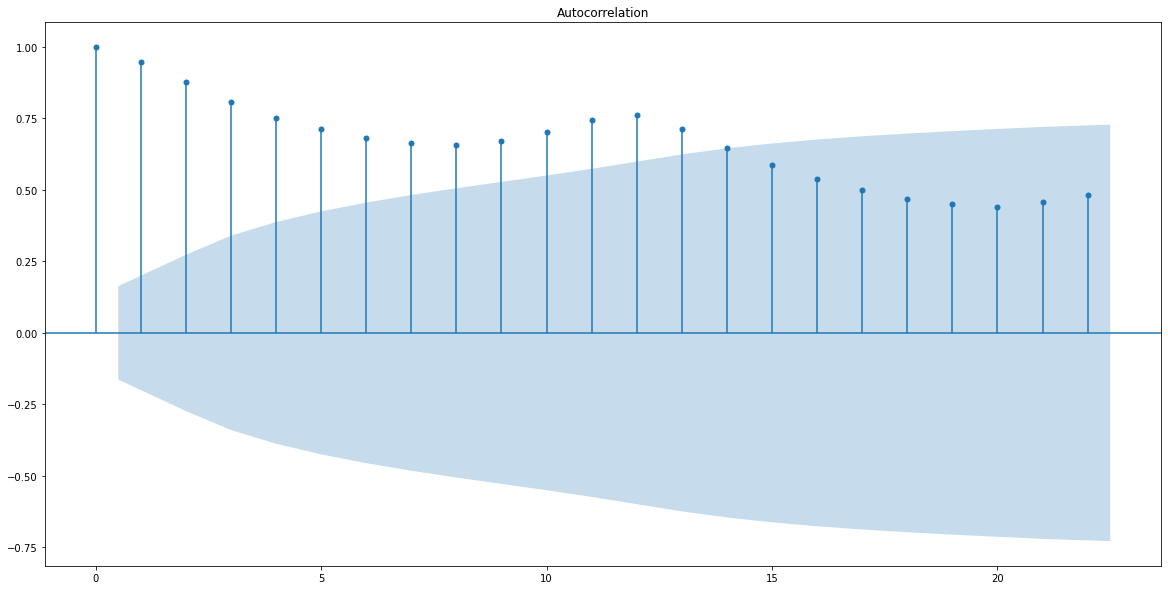

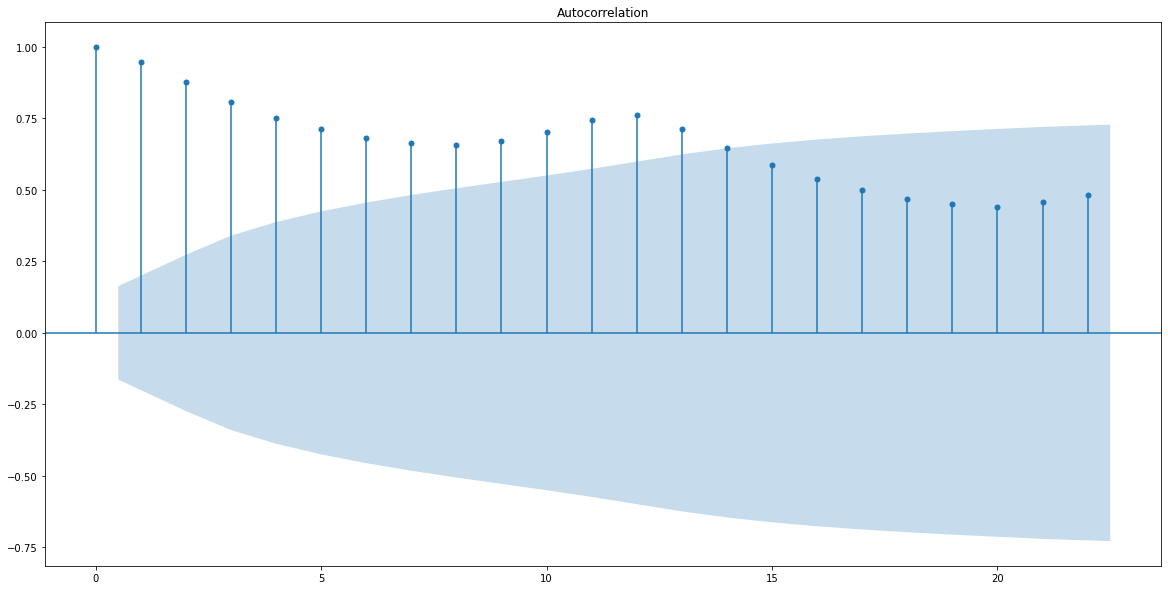

In [27]:
plot_acf(df_copy)

(-15.59561808374634, 1.856511600123444e-28, 0, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.8428088960275)


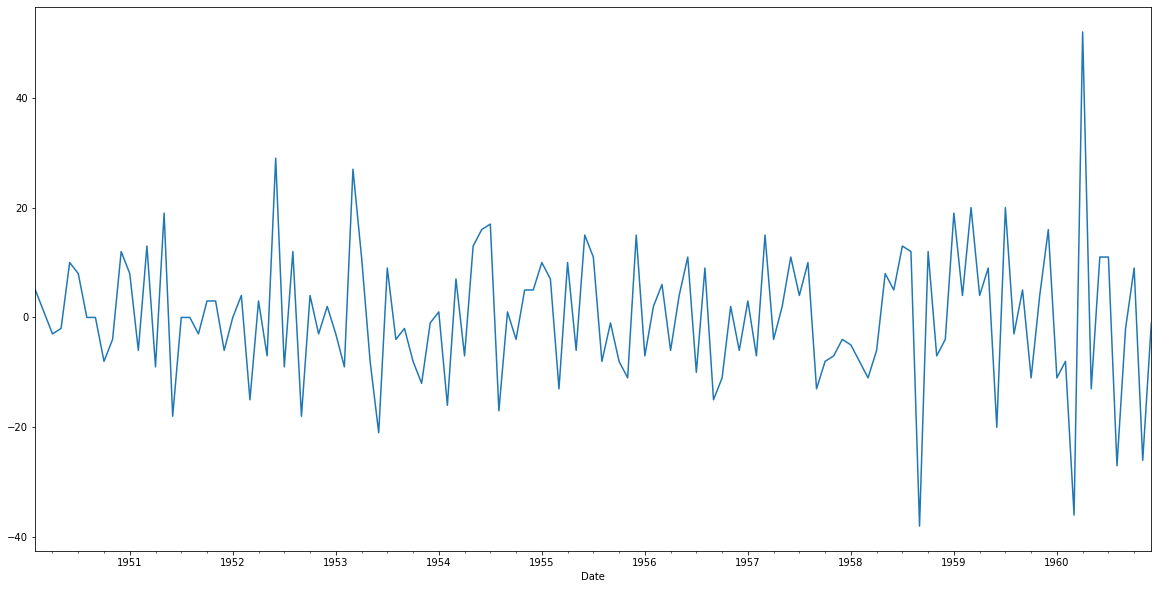

In [37]:
passenger_diff = df_copy.Passengers.diff(12)
passenger_diff = passenger_diff.diff(1)
passenger_diff = passenger_diff.dropna()
passenger_diff.plot()

print(adfuller(passenger_diff))

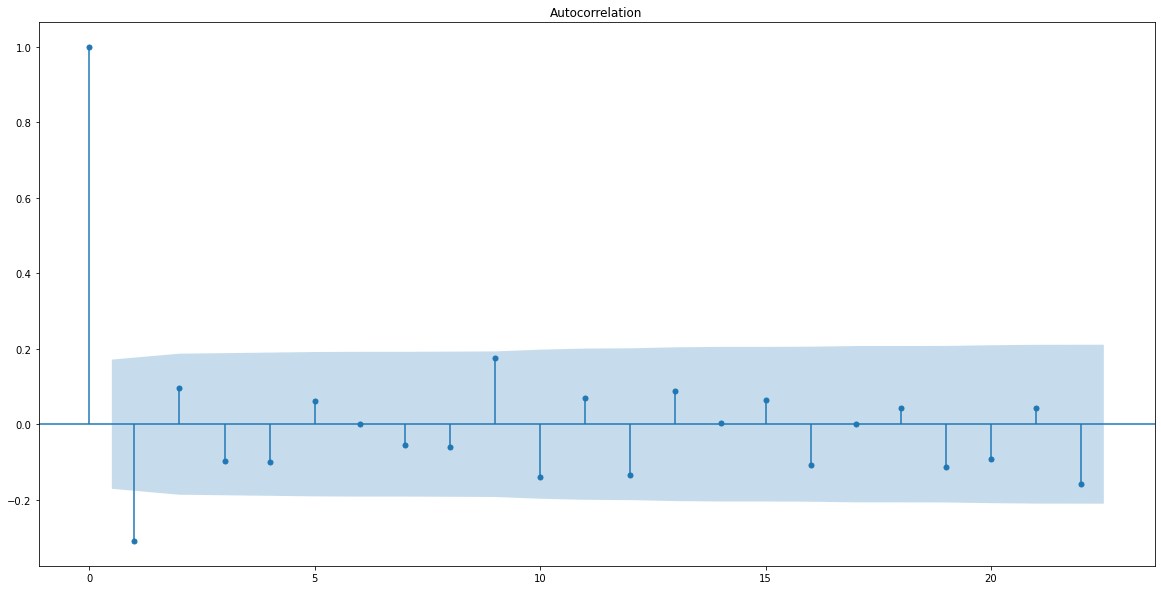

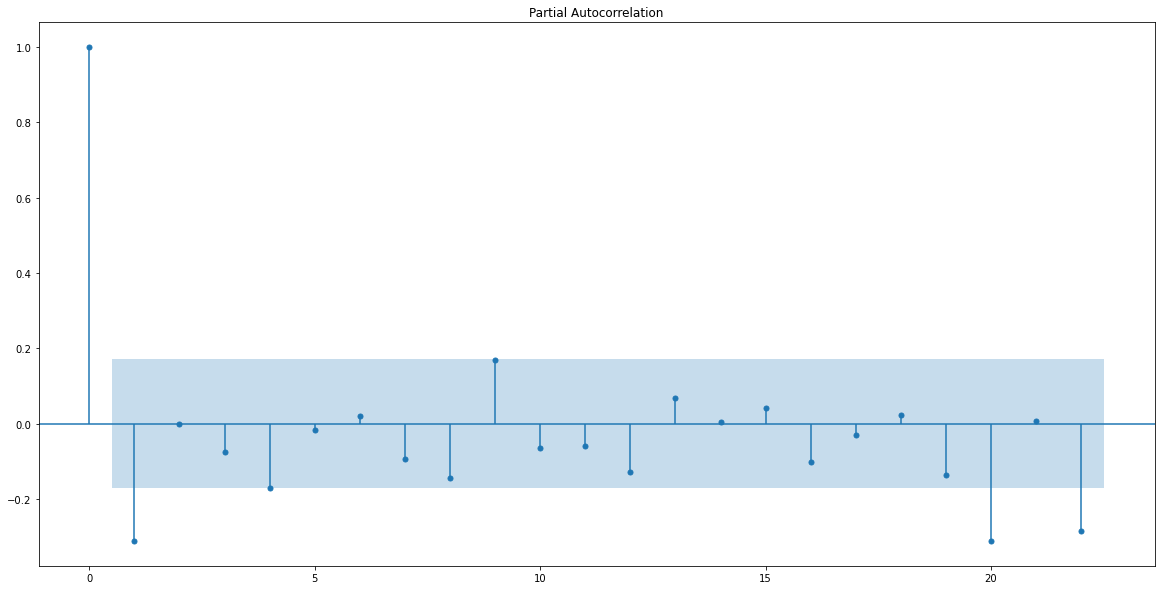

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(passenger_diff)
matplotlib.pyplot.show()
plot_pacf(passenger_diff)
matplotlib.pyplot.show()

In [36]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_copy.Passengers,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1024.4816429833936
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:937.7995265380555
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:850.457728683517
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:944.4876301158425
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:939.7984372654362
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:851.7659930289514
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:857.2829522040472
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:857.9055297769823
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:852.8880845570167
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1006.7919047398655
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:920.6308317604695
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:832.9538080341777
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:934.7975425749124
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:920.3192974989079
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 -

In [ ]:
#ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:822.9785272906739


In [41]:
mod = sm.tsa.statespace.SARIMAX(df_copy.Passengers, order=(1,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -506.246
Date:                              Fri, 11 Nov 2022   AIC                           1020.493
Time:                                      13:45:14   BIC                           1031.994
Sample:                                  01-01-1949   HQIC                          1025.166
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3226      0.086     -3.739      0.000      -0.492      -0.153
ar.S.L12      -0.89

<AxesSubplot:xlabel='Date'>

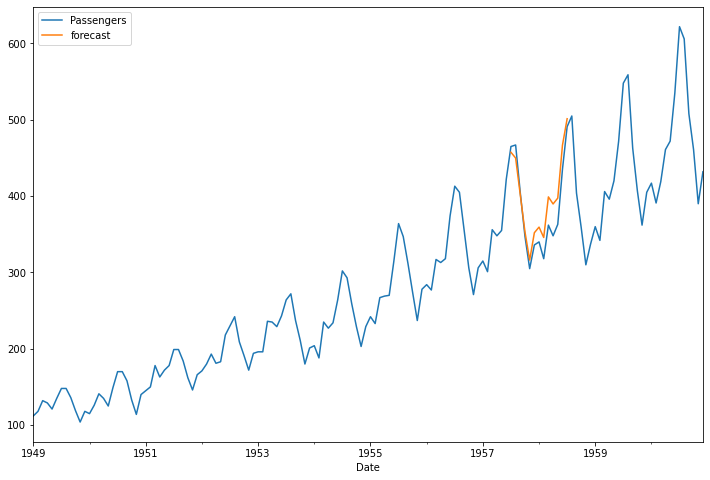

In [42]:
df_copy['forecast'] = results.predict(start = 102, end= 114, dynamic= True)  
df_copy[['Passengers', 'forecast']].plot(figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

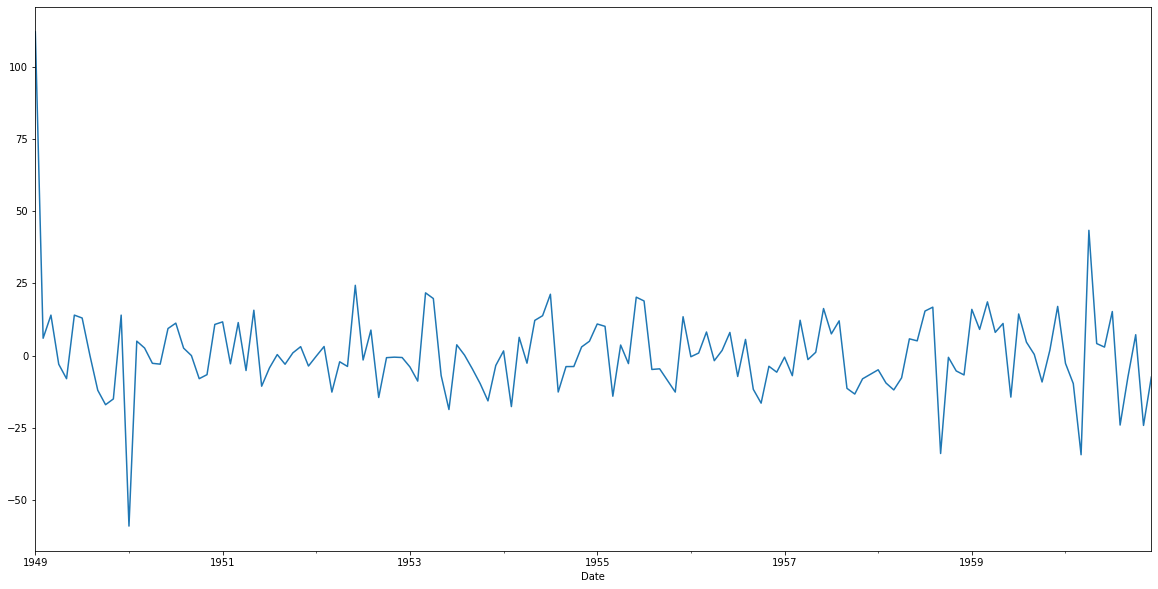

In [44]:
results.resid.plot()

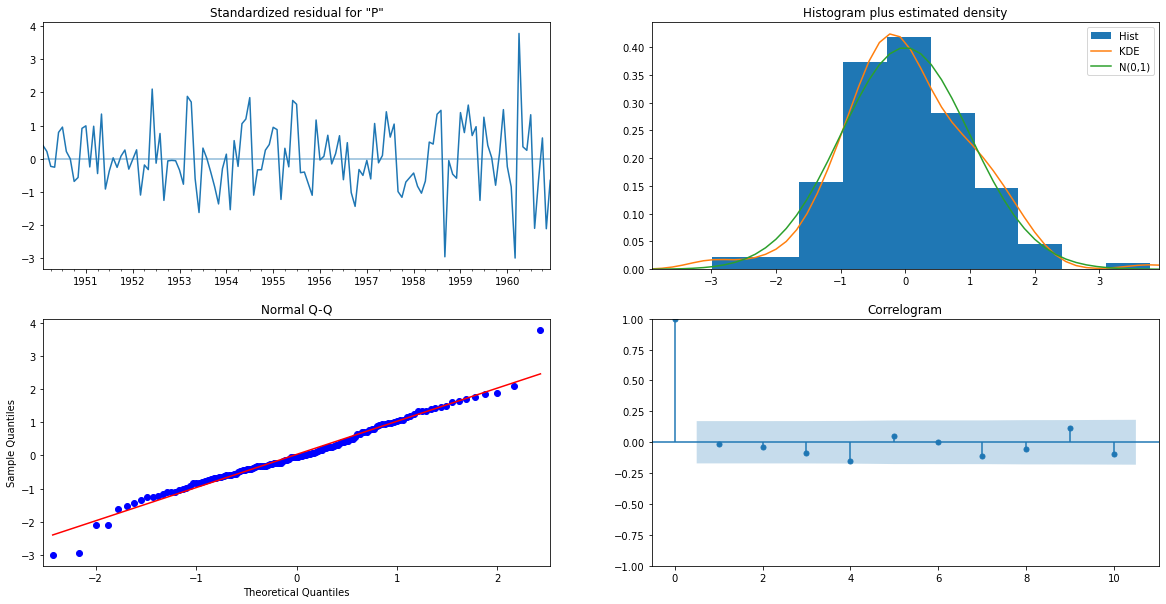

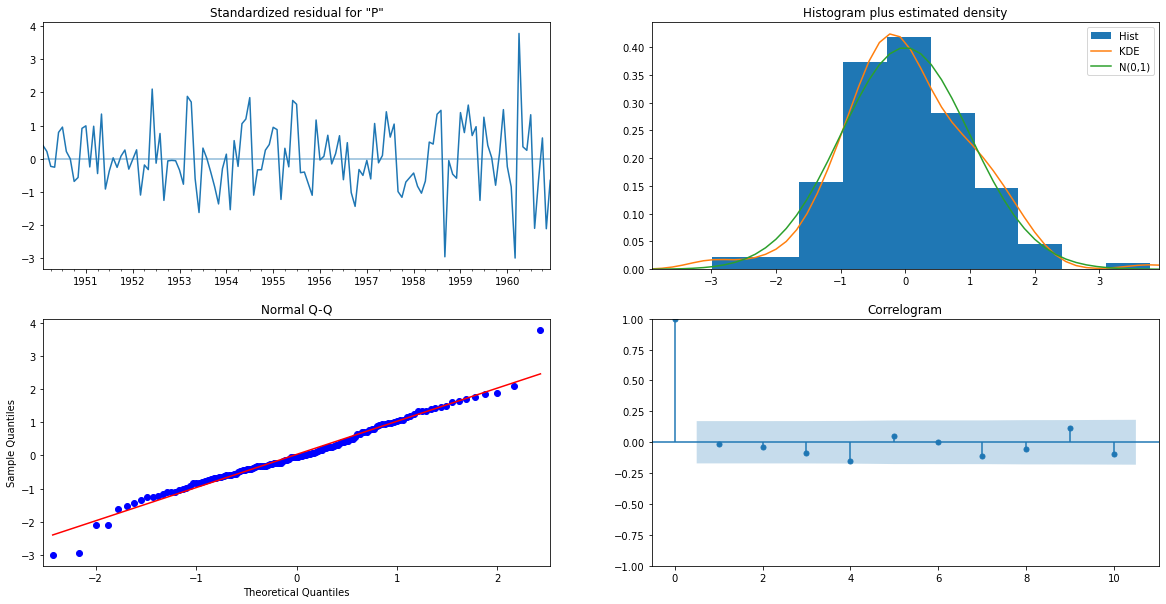

In [49]:
results.plot_diagnostics()